# 2022 NZMSA Data Science Submission.

In [551]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


%matplotlib inline

# Exploratory Data Analysis.

In [552]:
dataset = pd.read_csv("weather-data.csv")

dataset["gust"] = pd.to_numeric(dataset["gust"])

dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [553]:

# Average - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 50% - Median.
# 75% - The 75th percentile value.

dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


<AxesSubplot:xlabel='relh', ylabel='sknt'>

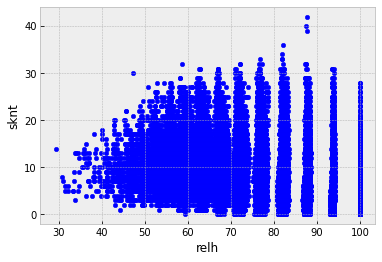

In [554]:
#The higher Wind Speed in knots, the higher the relative humidity of the envrioment in percentage, at nearly 2(sknt) = relh

dataset.plot.scatter(x = 'relh', y = 'sknt', s=None, c=None)

In [555]:
#Values closer to 0 shows no linear correlation between the values
#Values closer to 1 shows a positive linear correlation, -1 shows a negative linear correlation
#sknt and gust shows a strong positive linear correlation with each other

dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\64210\AppData\Local\Temp\ipykernel_29464\4160793720.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(3)
c:\Users\64210\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\64210\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
tmpc,1.000,0.795,-0.451,0.235,-0.168,nan
dwpc,0.795,1.000,0.178,-0.007,-0.154,nan
relh,-0.451,0.178,1.000,-0.415,-0.026,nan
sknt,0.235,-0.007,-0.415,1.000,0.963,nan
gust,-0.168,-0.154,-0.026,0.963,1.000,nan
peak_wind_drct,nan,nan,nan,nan,nan,nan


# Data Processing

In [556]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

#Dropped the peak_wind_drct column as there isnt any data in it
#Dropped the gust column as a lot of the data is missing

dataset.drop(columns=["peak_wind_drct", "gust"], inplace=True)
dataset.head()


,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [557]:
#The station is removed as its not a number

dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [558]:

dataset["valid"] = pd.to_datetime(dataset["valid"])
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [559]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103713 non-null  datetime64[ns]
 1   tmpc    103678 non-null  float64       
 2   dwpc    103678 non-null  float64       
 3   relh    103593 non-null  float64       
 4   sknt    103704 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 MB


In [560]:
X_train, X_test, y_train, y_test = train_test_split(dataset["valid"], dataset["tmpc"], test_size=0.2)

In [561]:
X_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 82970 entries, 5783 to 70218
Series name: valid
Non-Null Count  Dtype         
--------------  -----         
82970 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [562]:
X_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20743 entries, 19431 to 33545
Series name: valid
Non-Null Count  Dtype         
--------------  -----         
20743 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 324.1 KB


In [563]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 82970 entries, 5783 to 70218
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
82945 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [564]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20743 entries, 19431 to 33545
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
20733 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB


# Data Modelling

In [565]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

X, y = make_regression(n_samples=10000, n_features=10, noise=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [566]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [567]:

model.score(X_test, y_test)

0.7090126771387841

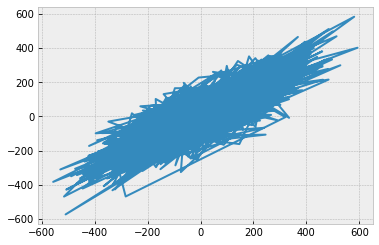

In [568]:

values = model.predict(X_test)
plt.plot(y_test, values)


ValueError: x and y must be the same size

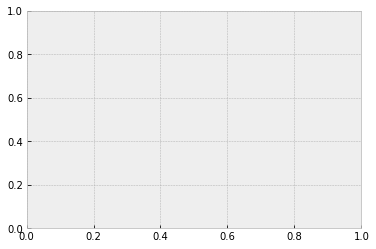

In [585]:
next_month = pd.date_range("2021-01-01", periods=10, freq="H").values.astype("float64")
values = model.predict([next_month])
plt.scatter(y_test[:], values)

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.

The model score shows 0.7, the closer to 1 it is the more positive colloration it has. This could be improved. 